In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import avar
%matplotlib notebook

path = os.getcwd() + "\\coronavirus_data"
csv_files = glob.glob(os.path.join(path, "*.csv"))
data = pd.read_csv(csv_files[0])
# data = data.loc[data['location'] == 'United States']
# data = data.loc[data['location'] == 'Iran']
data = data.loc[data['location'] == 'Afghanistan']
data = data.fillna(0).reset_index()
print(data['new_cases'])
# data

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
529    449.0
530      0.0
531      0.0
532    968.0
533    235.0
Name: new_cases, Length: 534, dtype: float64


<IPython.core.display.Javascript object>


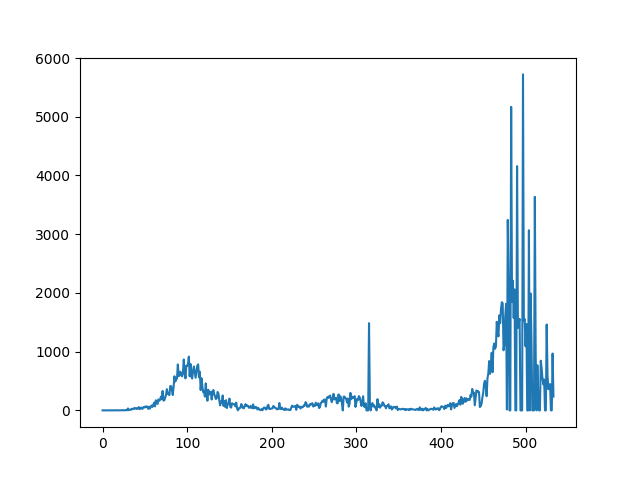

In [33]:
plt.plot(data['new_cases'])

<IPython.core.display.Javascript object>


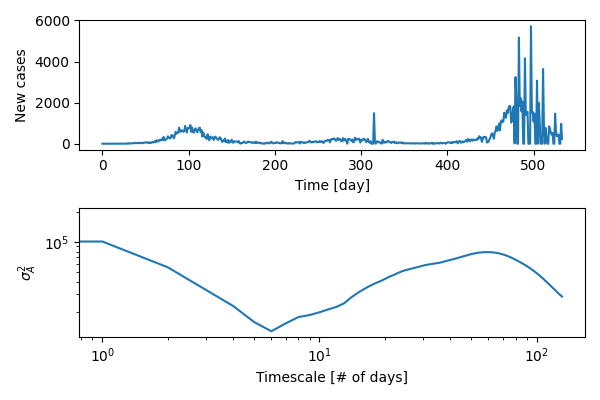

In [34]:
fig = plt.figure()
fig.set_size_inches(6, 4)
ax = fig.add_subplot(2, 1, 1)

ax.plot(data['new_cases'])
ax.set_xlabel('Time [day]')
ax.set_ylabel('New cases')
# ax.legend(['x','y','z'])


ct = avar.CharacteristicScale()

ax = fig.add_subplot(2, 1, 2)
ax.plot(ct.allanvar(data['new_cases'].to_numpy()))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Timescale [# of days]')
ax.set_ylabel('$\sigma_A^2$')
# ax.legend(['x','y'])
fig.tight_layout()



<IPython.core.display.Javascript object>


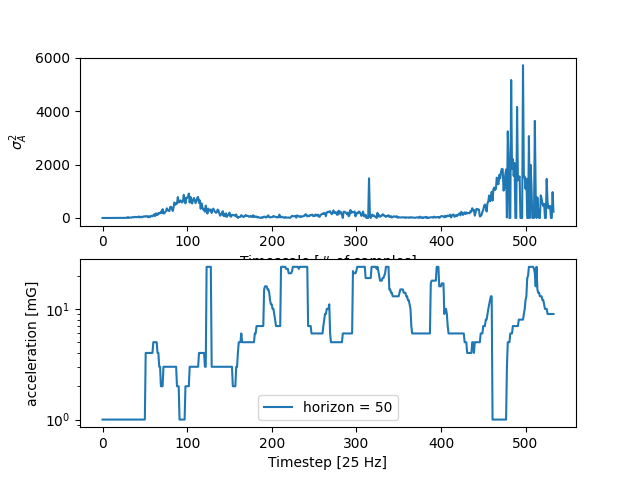

In [35]:
from scipy.ndimage import gaussian_filter1d

fig, axs = plt.subplots(2)
# horizons = [50, 100, 200]
horizons = [50]
for h in horizons:
    char = avar.CharacteristicScale(horizon=h)
    
    M_c = []
    for day, v in enumerate(data['new_cases'].to_numpy()):
        char.memory.append(v)
        if day > h:
            davar = char.dynallanvar()
            davar = gaussian_filter1d(davar,2)
            m_c = char.find_charecteristic_scale(davar)
            M_c.append(m_c)
        else:
            M_c.append(1)
    axs[1].plot(M_c, label='horizon = '+str(h))
    axs[1].set_xlabel('Timestep [25 Hz]')
    axs[1].set_ylabel('acceleration [mG]')
    axs[1].set_yscale("log")
    axs[1].legend()
axs[0].plot(data['new_cases'].to_numpy())
axs[0].set_xlabel('Timescale [# of samples]')
axs[0].set_ylabel('$\sigma_A^2$')
plt.show()